# **Game Winner Prediction**

## Problem Statement


Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model which is an attempt to predict the win probability of the Pubg match and to look at the important factors affecting the win probability of the pubg game.



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data=pd.read_csv('/content/pubg.csv')

In [ ]:
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0,0.0000,0.0,0.00,0.0,0.0,244.80,1.0,1466.0,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0,0.0045,0.0,11.04,0.0,0.0,1434.00,5.0,0.0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0,0.0000,0.0,0.00,0.0,0.0,161.80,2.0,0.0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0,0.0000,0.0,0.00,0.0,0.0,202.70,3.0,0.0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0,0.0000,0.0,0.00,0.0,0.0,49.75,2.0,0.0,0.1875


## Domain Analysis – PUBG Win Probability Prediction

The main goal of this dataset is to **predict the win probability of a player/team in a PUBG match** based on their gameplay performance, movement patterns, combat actions, and match-related context.

---

### 🎯 Target / Dependent Feature — `winPlacePerc`

- A continuous value between **0.0 and 1.0**
- Represents the **normalized final placement** of a player/team:
  - **1.0** → Winner (1st place)
  - **0.0** → Last place
  - Values in between reflect relative performance among all match participants
- Serves as a proxy for **win probability**
- Suitable for **regression-based prediction**

---

### 📥 Input / Independent Features

These features describe combat performance, survivability, movement strategies, and match metadata that influence win probability.

---

#### **Identifiers**
- `Id` — Unique record identifier  
- `groupId` — Team/Squad identifier  
- `matchId` — Match identifier  

*(Primarily used for grouping; not directly predictive.)*

---

#### **Player Performance & Combat Statistics**
- `assists` — Number of assists  
- `damageDealt` — Total damage inflicted  
- `DBNOs` — Knockdowns (Down-But-Not-Out)  
- `headshotKills` — Kills via headshots  
- `kills` — Total kills  
- `killStreaks` — Maximum consecutive kills  
- `longestKill` — Longest kill distance  
- `roadKills` — Kills using vehicles  
- `teamKills` — Friendly fire kills (negative effect)

---

#### **Survivability & Resource Usage**
- `boosts` — Boost items consumed  
- `heals` — Healing items consumed  
- `revives` — Number of teammates revived  

*(Indicates survival duration and sustainability.)*

---

#### **Movement & Positioning**
- `walkDistance` — Distance traveled on foot  
- `rideDistance` — Distance traveled in vehicles  
- `swimDistance` — Distance traveled by swimming  
- `vehicleDestroys` — Vehicles destroyed  

*(Reflects movement strategy and positioning quality.)*

---

#### **Match Context & Metadata**
- `matchDuration` — Duration of the match  
- `matchType` — Type of match (solo, duo, squad, FPP/TPP)  
- `maxPlace` — Maximum placement available  
- `killPlace` — Kill rank among all players  

---

#### **Ranking Points**
- `rankPoints` — Player’s ranking score  
- `killPoints` — Points based on kills  
- `winPoints` — Points based on wins  

*(Useful to estimate player skill level.)*

---

#### **Weapons & Inventory**
- `weaponsAcquired` — Total weapons collected  

---

## 🔍 Summary

The PUBG dataset captures comprehensive information about **combat performance**, **movement**, **resource usage**, and **match context**. Using these features, the goal is to build a regression model that predicts `winPlacePerc` — a continuous score representing **win probability** or expected placement.

This domain analysis forms the foundation for modeling how gameplay behaviors influence winning outcomes in PUBG.



## Basic Checks

In [ ]:
data.shape

(63625, 29)

In [ ]:
data.dtypes

,0
Id,object
groupId,object
matchId,object
assists,int64
boosts,int64
damageDealt,float64
DBNOs,int64
headshotKills,int64
heals,int64
killPlace,int64


In [ ]:
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0,0.0000,0.0,0.00,0.0,0.0,244.80,1.0,1466.0,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0,0.0045,0.0,11.04,0.0,0.0,1434.00,5.0,0.0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0,0.0000,0.0,0.00,0.0,0.0,161.80,2.0,0.0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0,0.0000,0.0,0.00,0.0,0.0,202.70,3.0,0.0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0,0.0000,0.0,0.00,0.0,0.0,49.75,2.0,0.0,0.1875


In [ ]:
data.tail()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
63620,d339b1acc38996,ae96a0021a112e,3a853028663be4,0,0,7.46,0,0,1,28,...,0.0,0.0,0.0,0.0,0.0,0.0,441.4,3.0,0.0,0.4565
63621,c4ed98a109f1d3,388be34214b254,4be565c0f1373c,0,2,78.05,0,0,0,56,...,0.0,0.0,0.0,0.0,0.0,0.0,1894.0,5.0,1426.0,0.5926
63622,731398b3c5553e,5190118a3f1fcd,2d1f979d86fdcb,0,6,72.33,1,0,18,22,...,1.0,2962.0,0.0,0.0,0.0,0.0,2719.0,7.0,0.0,0.8077
63623,f1daaadc4dca08,23885da50be7fb,fef3aa4c612850,1,4,260.30,2,0,1,18,...,0.0,6764.0,0.0,0.0,0.0,0.0,3118.0,2.0,0.0,0.9583
63624,279cea3284bf4c,3d369b7aa06370,40a593cfa78aed,0,3,24.15,0,0,3,52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63625 entries, 0 to 63624
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               63625 non-null  object 
 1   groupId          63625 non-null  object 
 2   matchId          63625 non-null  object 
 3   assists          63625 non-null  int64  
 4   boosts           63625 non-null  int64  
 5   damageDealt      63625 non-null  float64
 6   DBNOs            63625 non-null  int64  
 7   headshotKills    63625 non-null  int64  
 8   heals            63625 non-null  int64  
 9   killPlace        63625 non-null  int64  
 10  killPoints       63625 non-null  int64  
 11  kills            63625 non-null  int64  
 12  killStreaks      63625 non-null  int64  
 13  longestKill      63625 non-null  float64
 14  matchDuration    63625 non-null  int64  
 15  matchType        63624 non-null  object 
 16  maxPlace         63624 non-null  float64
 17  numGroups   

In [ ]:
data.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,63625.000000,63625.000000,63625.000000,63625.000000,63625.000000,63625.000000,63625.000000,63625.000000,63625.000000,63625.000000,...,63624.000000,63624.000000,63624.000000,63624.00000,63624.000000,63624.000000,63624.000000,63624.000000,63624.000000,63624.000000
mean,0.232786,1.123191,130.731061,0.655827,0.223528,1.371631,47.566507,506.548558,0.924967,0.544487,...,0.161999,603.800356,0.003835,4.36034,0.024095,0.007639,1159.516077,3.672608,609.241544,0.473983
std,0.582813,1.727655,170.456767,1.150236,0.590126,2.656612,27.481518,626.739409,1.554360,0.715749,...,0.463924,1487.512138,0.080964,29.16007,0.166325,0.089382,1186.697079,2.441933,739.945733,0.307829
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,156.800000,2.000000,0.000000,0.200000
50%,0.000000,0.000000,83.390000,0.000000,0.000000,0.000000,47.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,692.000000,3.000000,0.000000,0.461500
75%,0.000000,2.000000,185.900000,1.000000,0.000000,2.000000,71.000000,1172.000000,1.000000,1.000000,...,0.000000,0.025400,0.000000,0.00000,0.000000,0.000000,1984.000000,5.000000,1495.000000,0.744250
max,13.000000,21.000000,3725.000000,32.000000,17.000000,47.000000,100.000000,2140.000000,35.000000,7.000000,...,9.000000,25930.000000,6.000000,1220.00000,4.000000,3.000000,13530.000000,52.000000,1942.000000,1.000000


In [ ]:
data['winPlacePerc'].describe()

,winPlacePerc
count,63624.000000
mean,0.473983
std,0.307829
min,0.000000
25%,0.200000
50%,0.461500
75%,0.744250
max,1.000000


In [ ]:
data.nunique()

,0
Id,63625
groupId,62612
matchId,35155
assists,11
boosts,16
damageDealt,11894
DBNOs,23
headshotKills,12
heals,36
killPlace,100


## Data cleaning

In [ ]:
data.isnull().sum()

,0
Id,0
groupId,0
matchId,0
assists,0
boosts,0
damageDealt,0
DBNOs,0
headshotKills,0
heals,0
killPlace,0


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

,0
Id,0
groupId,0
matchId,0
assists,0
boosts,0
damageDealt,0
DBNOs,0
headshotKills,0
heals,0
killPlace,0


In [ ]:
# Checking unique values of important columns
check_cols = [
    "matchType","assists", "boosts", "damageDealt", "DBNOs", "headshotKills",
    "heals", "killPlace", "killPoints", "kills", "killStreaks",
    "longestKill", "matchDuration", "maxPlace", "rankPoints",
    "revives", "rideDistance", "roadKills", "swimDistance",
    "teamKills", "vehicleDestroys", "walkDistance",
    "weaponsAcquired", "winPoints"
]
for col in check_cols:
    print(f"\nUnique values in '{col}':")
    print(data[col].unique())



Unique values in 'matchType':
['squad-fpp' 'duo' 'solo-fpp' 'squad' 'duo-fpp' 'solo' 'normal-squad-fpp'
 'crashfpp' 'flaretpp' 'normal-solo-fpp' 'flarefpp' 'normal-duo-fpp'
 'normal-duo' 'normal-squad' 'crashtpp' 'normal-solo']

Unique values in 'assists':
[ 0  1  3  2  4  6  5  8  9  7 13]

Unique values in 'boosts':
[ 0  1  2  3  4  6  5  9  7  8 11 10 13 14 12 21]

Unique values in 'damageDealt':
[ 0.   91.47 68.   ... 36.05 42.03  7.46]

Unique values in 'DBNOs':
[ 0  1  6  4  3  2  5 10  8  7  9 13 21 12 11 19 32 18 24 22 20 14 15]

Unique values in 'headshotKills':
[ 0  1  2  3  6  4  5  8  9  7 17 10]

Unique values in 'heals':
[ 0  5  2 14 12  1  8  3  4  6  9 13  7 24 10 15 25 11 18 17 20 16 29 23
 19 21 22 27 28 32 47 26 31 30 43 33]

Unique values in 'killPlace':
[ 60  57  47  75  45  44  96  48  64  74  37   5  25  72  13  79  18  15
   2   3  11  78   7   6  87  62  80  61  34  24  82  73  31  86  46  12
  27  77  19  10  63  67  36   4  29  16   8  41  21  38  55  49  91

In [ ]:
# Drop identifier columns that do not contribute to prediction
# (Id, groupId, matchId are unique/technical IDs with no analytical value)
data.drop(["Id", "groupId", "matchId"], axis=1, inplace=True)


In [ ]:
data.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,0.00,0,0,0,60,1241,0,0,...,0.0,0.0000,0.0,0.00,0.0,0.0,244.80,1.0,1466.0,0.4444
1,0,0,91.47,0,0,0,57,0,0,0,...,0.0,0.0045,0.0,11.04,0.0,0.0,1434.00,5.0,0.0,0.6400
2,1,0,68.00,0,0,0,47,0,0,0,...,0.0,0.0000,0.0,0.00,0.0,0.0,161.80,2.0,0.0,0.7755
3,0,0,32.90,0,0,0,75,0,0,0,...,0.0,0.0000,0.0,0.00,0.0,0.0,202.70,3.0,0.0,0.1667
4,0,0,100.00,0,0,0,45,0,1,1,...,0.0,0.0000,0.0,0.00,0.0,0.0,49.75,2.0,0.0,0.1875


## Data Cleaning Conclusion

All missing values in the dataset were identified and handled appropriately by either imputing them with suitable statistical measures or removing incomplete entries where necessary, ensuring no null values interfere with the modeling stage.

Duplicate records were checked and removed to maintain data integrity and prevent bias during training.

Non-informative identifier columns (`Id`, `groupId`, `matchId`) were dropped because they do not contribute to gameplay behavior or win prediction and would negatively affect correlation analysis and model performance.

After addressing missing values, eliminating duplicates, and removing irrelevant columns, the dataset is now clean, consistent, and fully prepared for exploratory data analysis (EDA).


## exploratory data analysis (EDA).

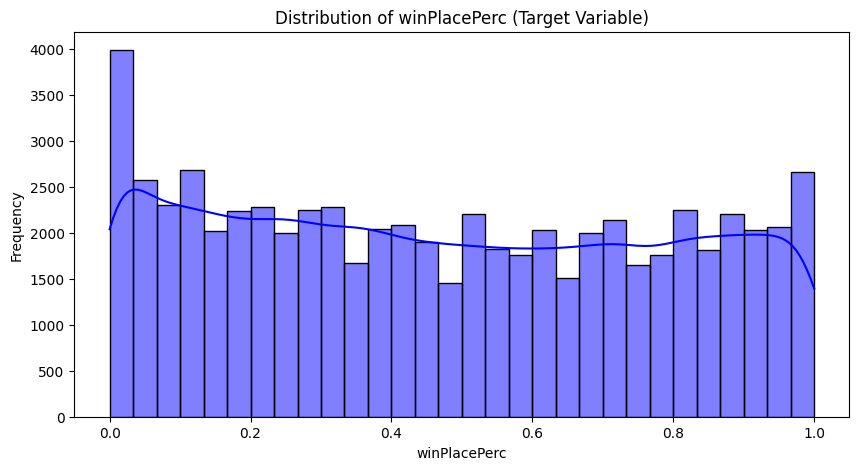

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data['winPlacePerc'], kde=True, bins=30, color="blue")
plt.title("Distribution of winPlacePerc (Target Variable)")
plt.xlabel("winPlacePerc")
plt.ylabel("Frequency")
plt.show()


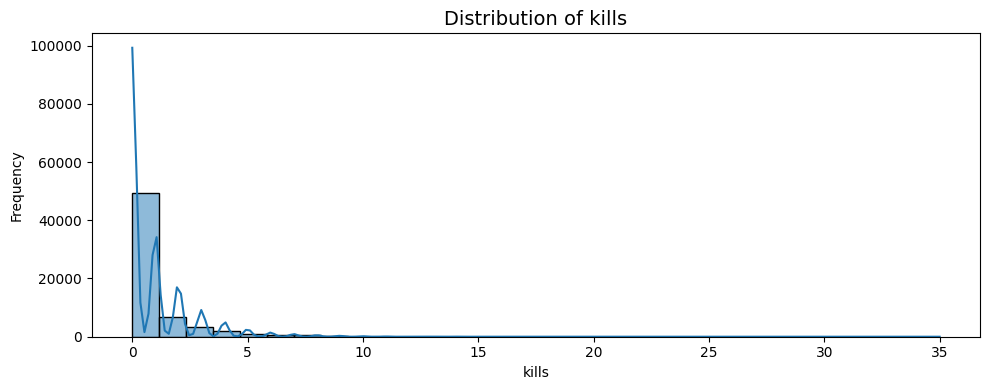

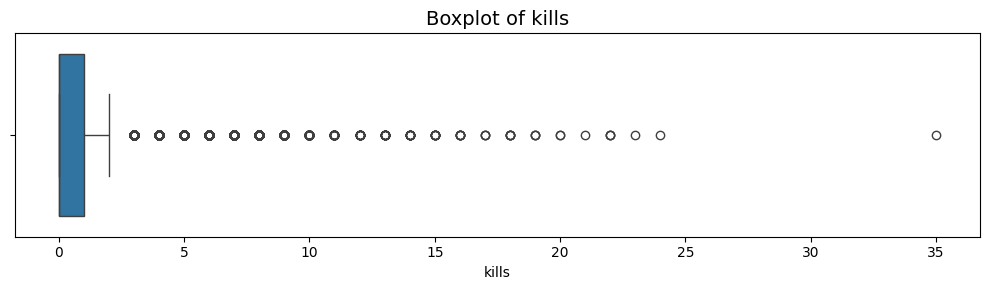

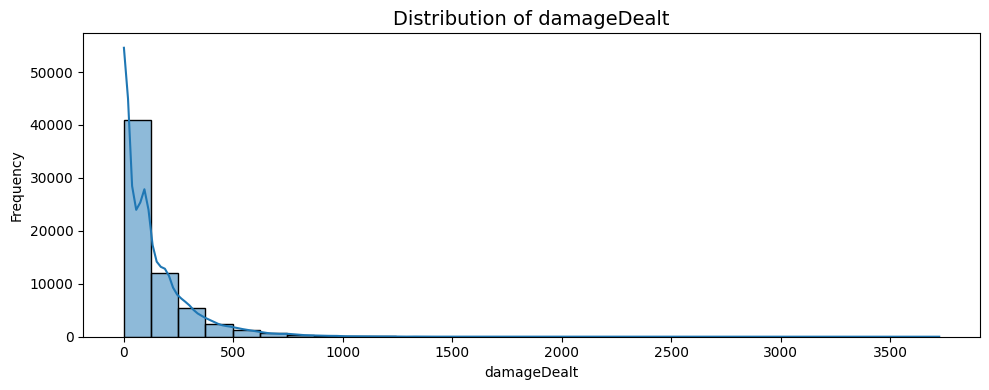

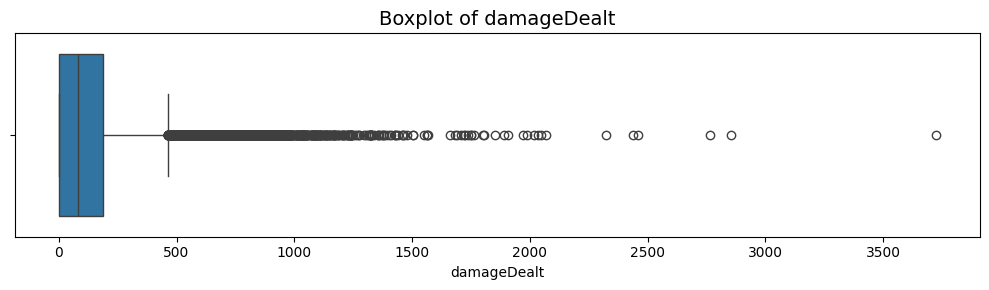

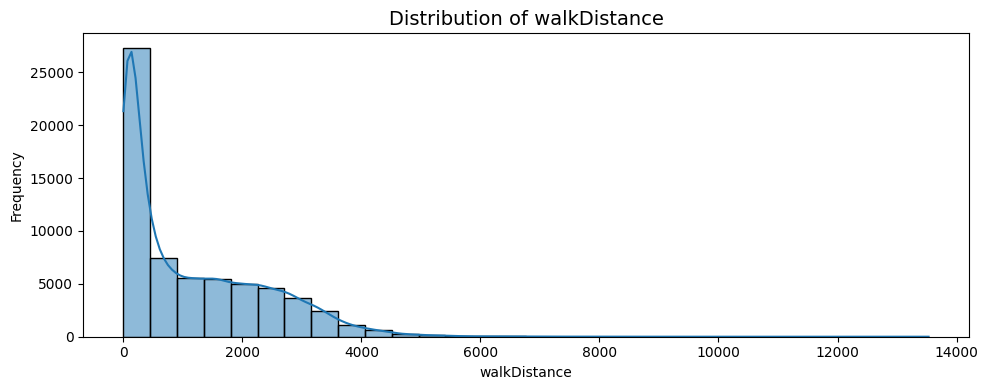

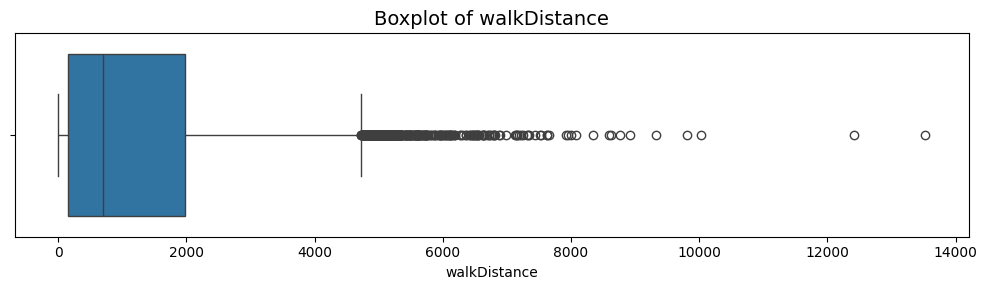

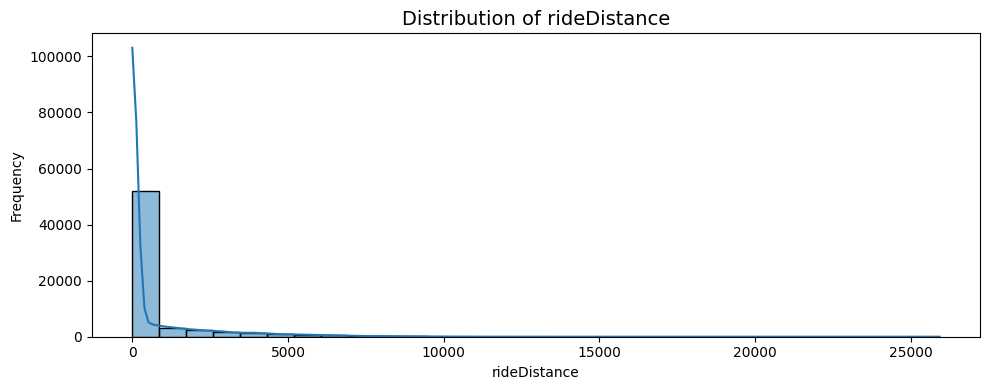

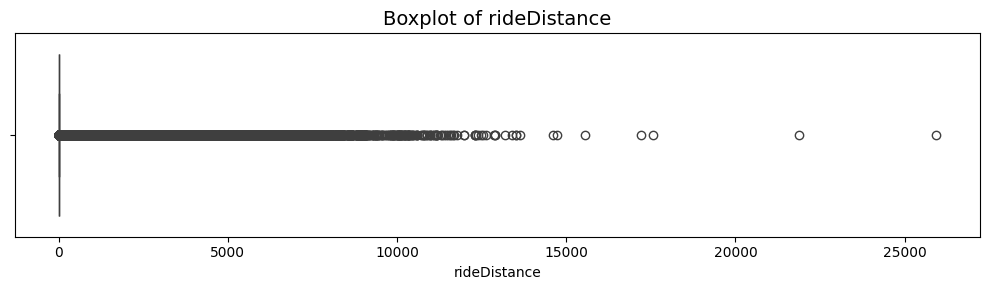

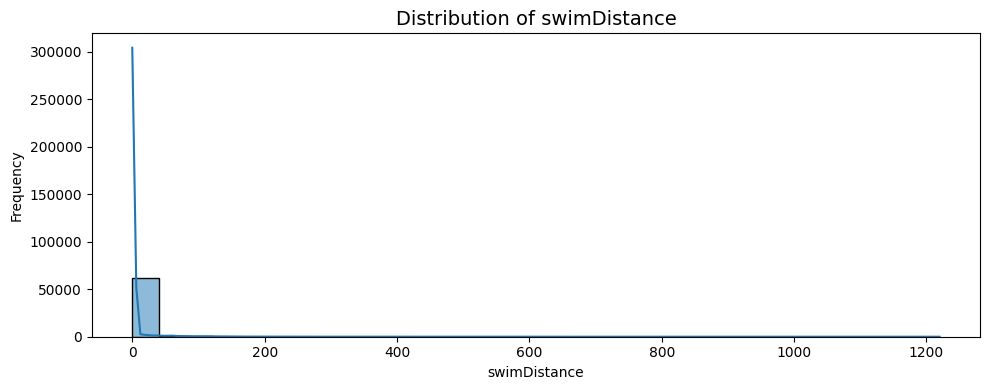

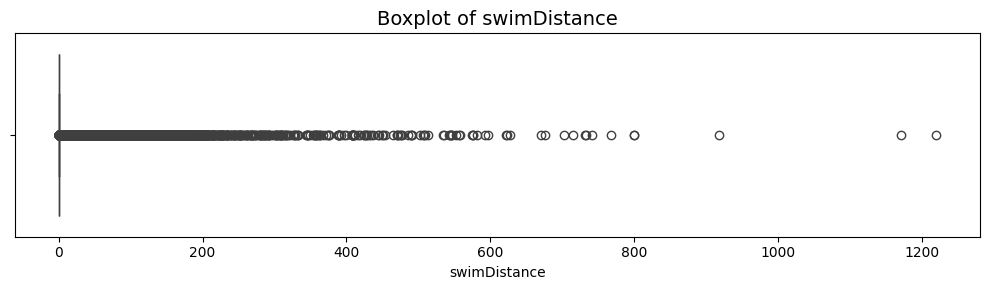

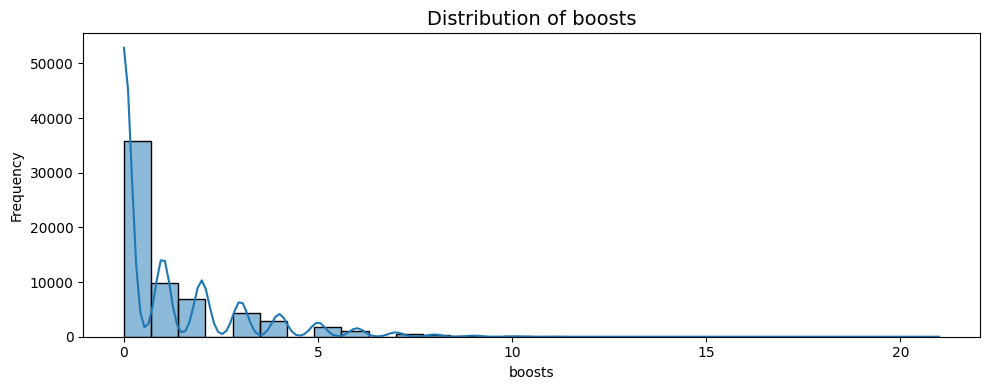

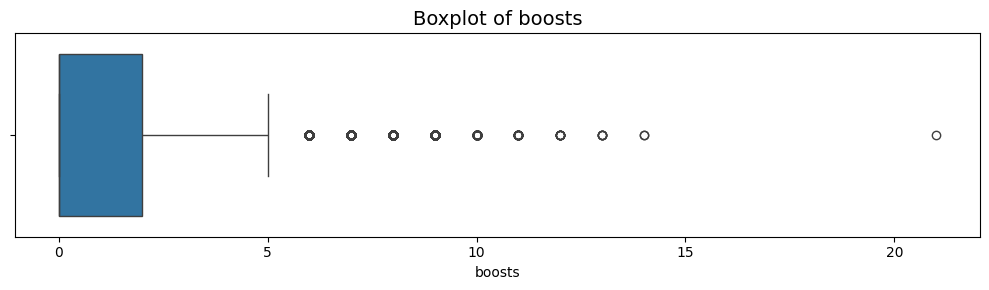

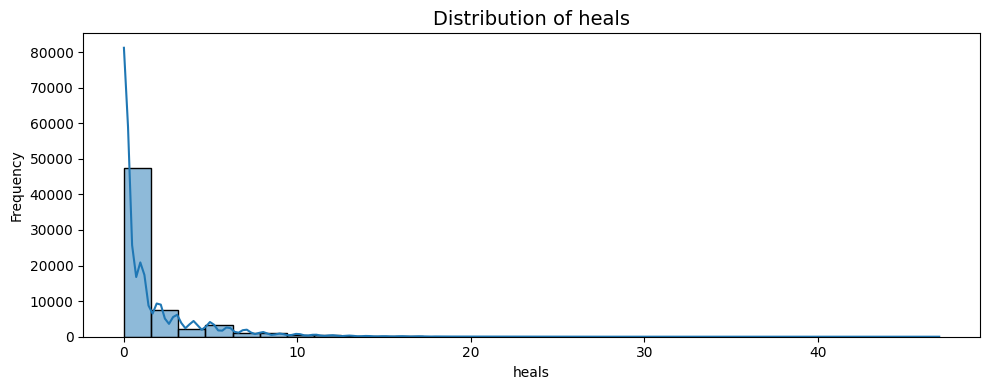

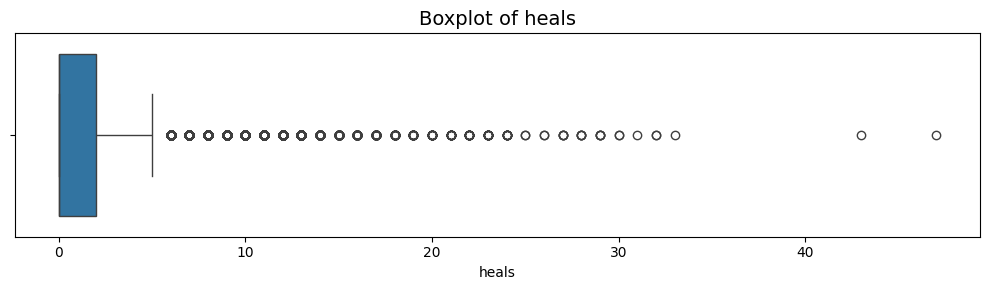

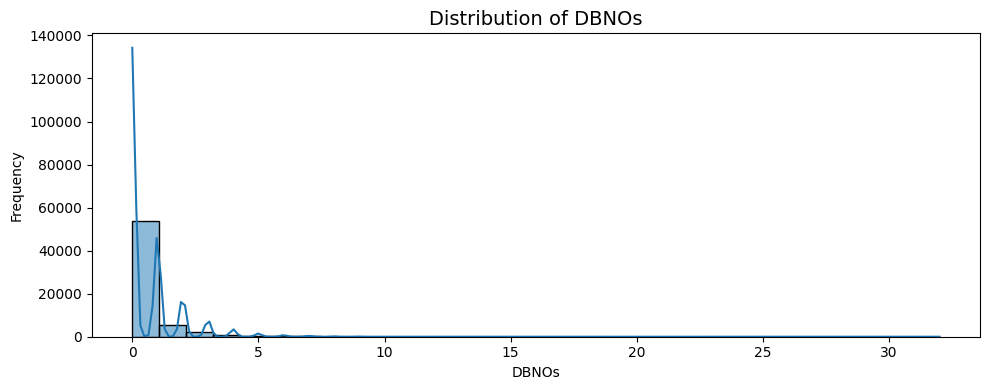

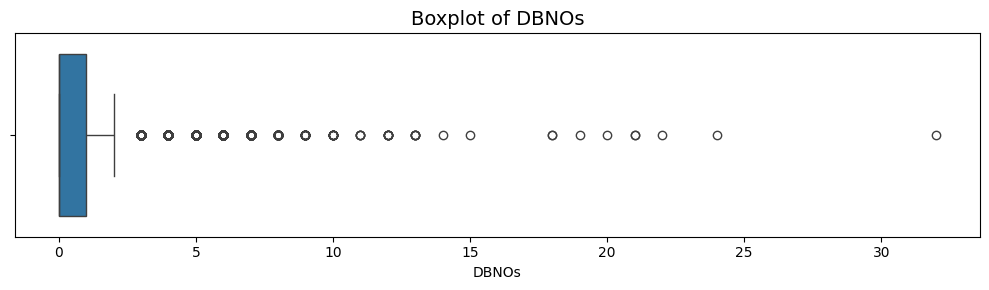

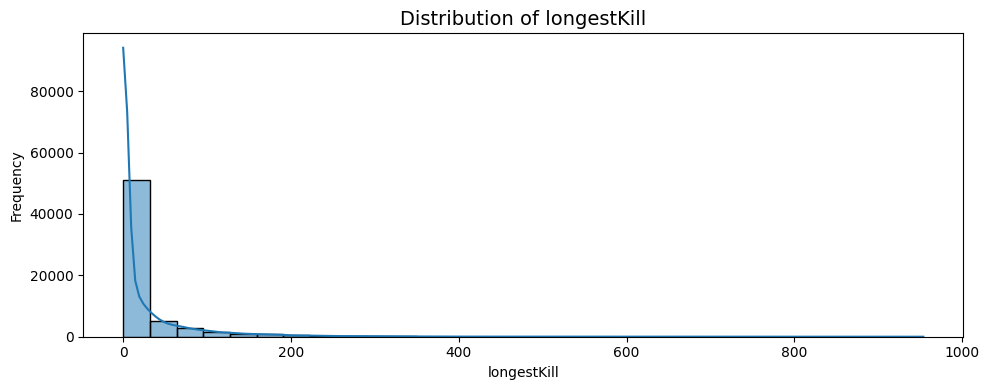

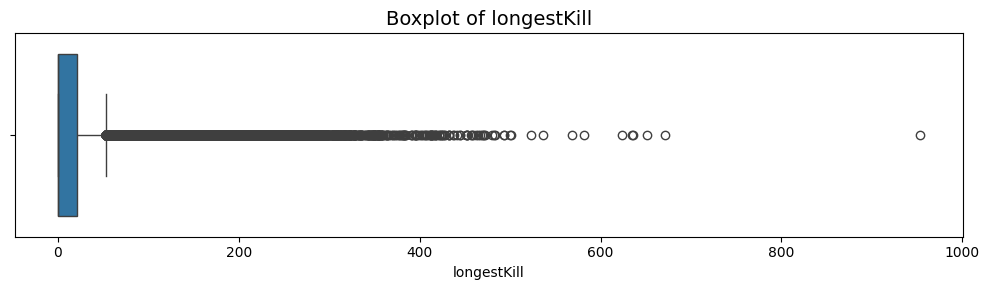

In [ ]:
num_cols = [
    "kills", "damageDealt", "walkDistance", "rideDistance",
    "swimDistance", "boosts", "heals", "DBNOs", "longestKill"
]

for col in num_cols:

    # Histogram + KDE
    plt.figure(figsize=(10, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

    # Boxplot
    plt.figure(figsize=(10, 3))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}", fontsize=14)
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()



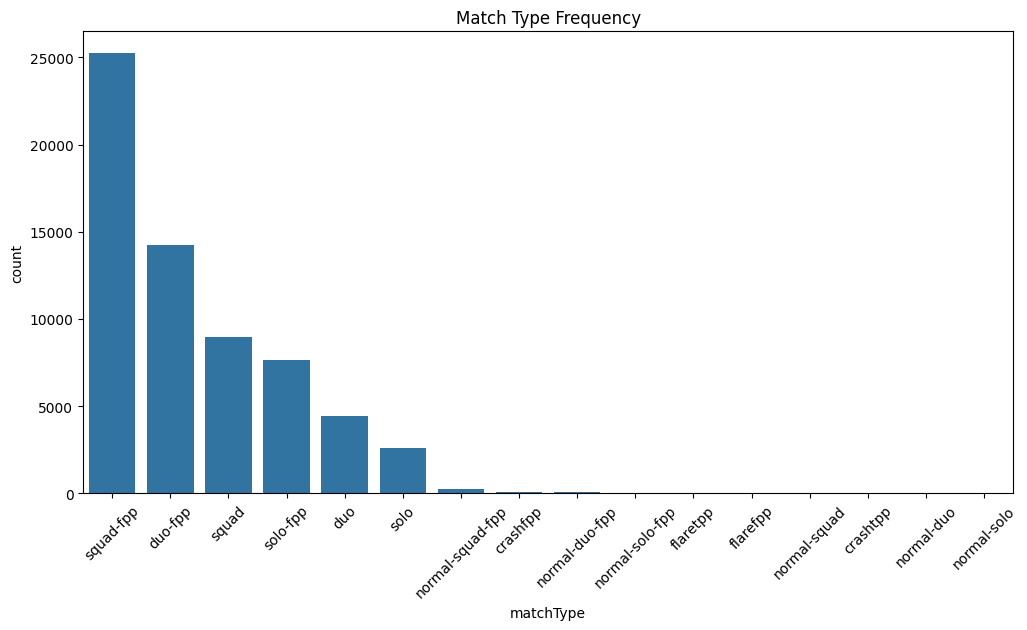

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x="matchType", order=data["matchType"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Match Type Frequency")
plt.show()


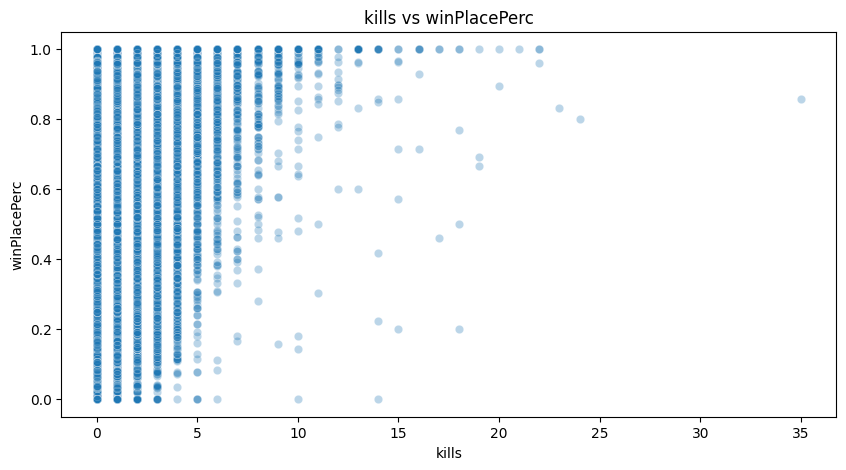

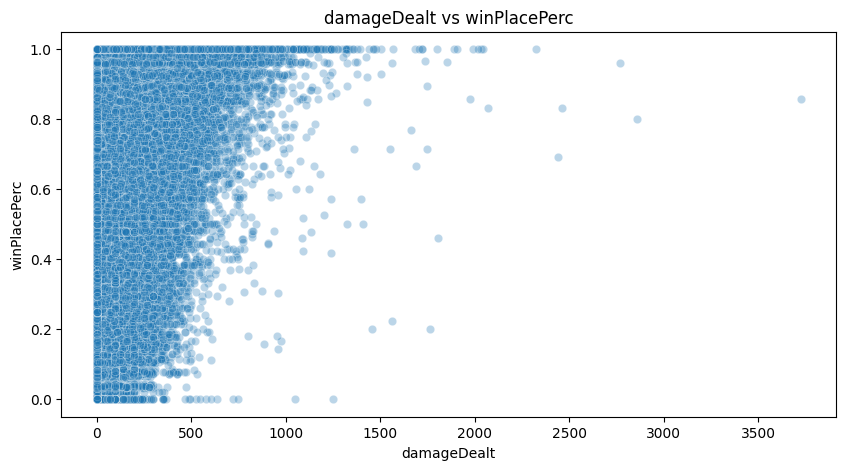

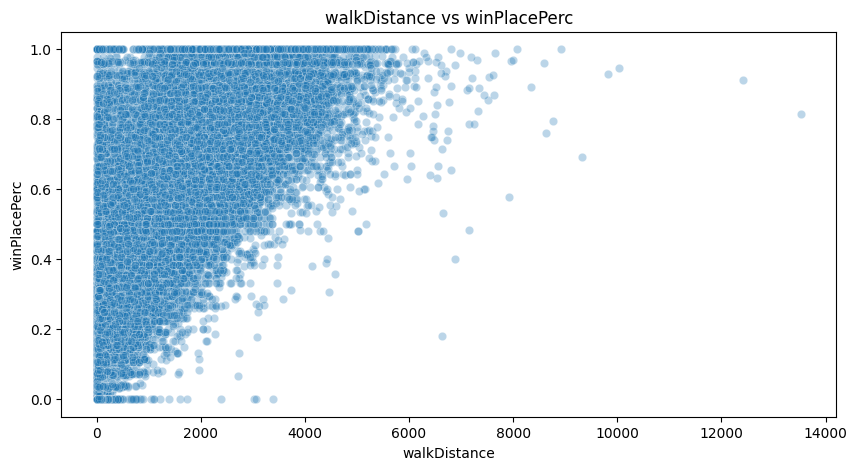

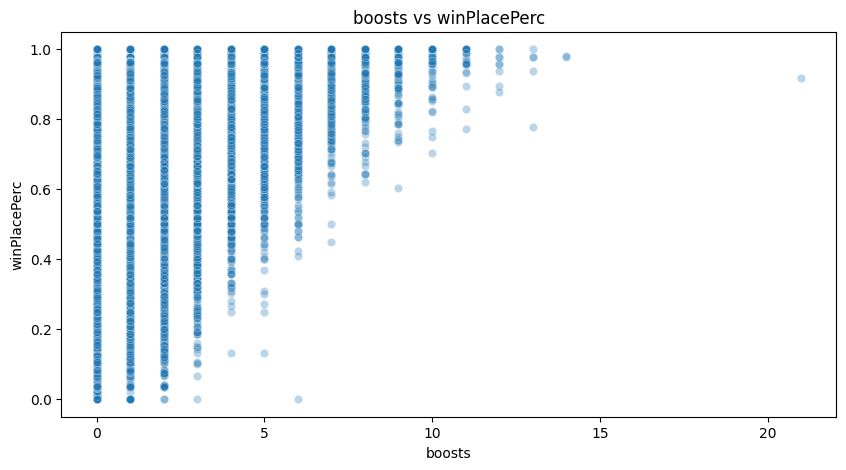

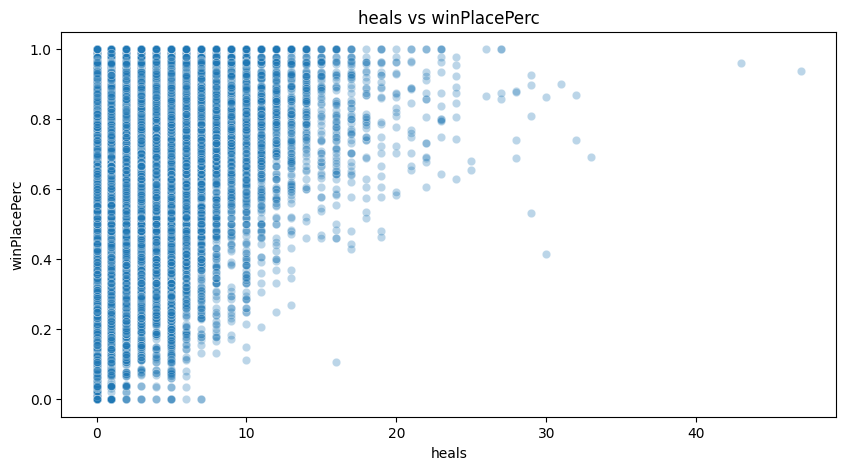

In [ ]:
important_features = ["kills", "damageDealt", "walkDistance", "boosts", "heals"]

for col in important_features:
    plt.figure(figsize=(10,5))
    sns.scatterplot(data=data, x=col, y="winPlacePerc", alpha=0.3)
    plt.title(f"{col} vs winPlacePerc")
    plt.show()


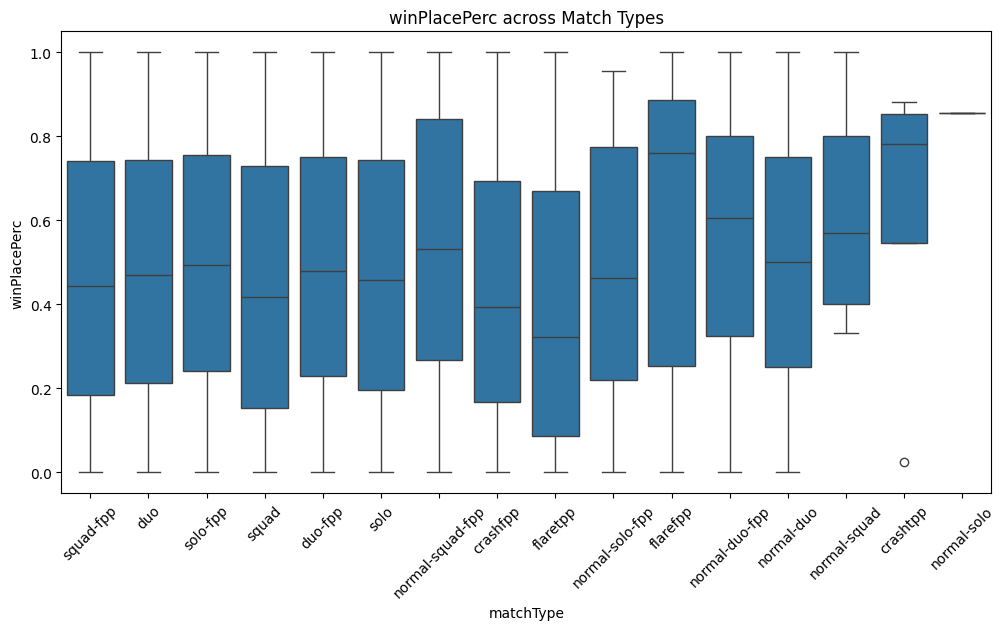

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data, x="matchType", y="winPlacePerc")
plt.xticks(rotation=45)
plt.title("winPlacePerc across Match Types")
plt.show()


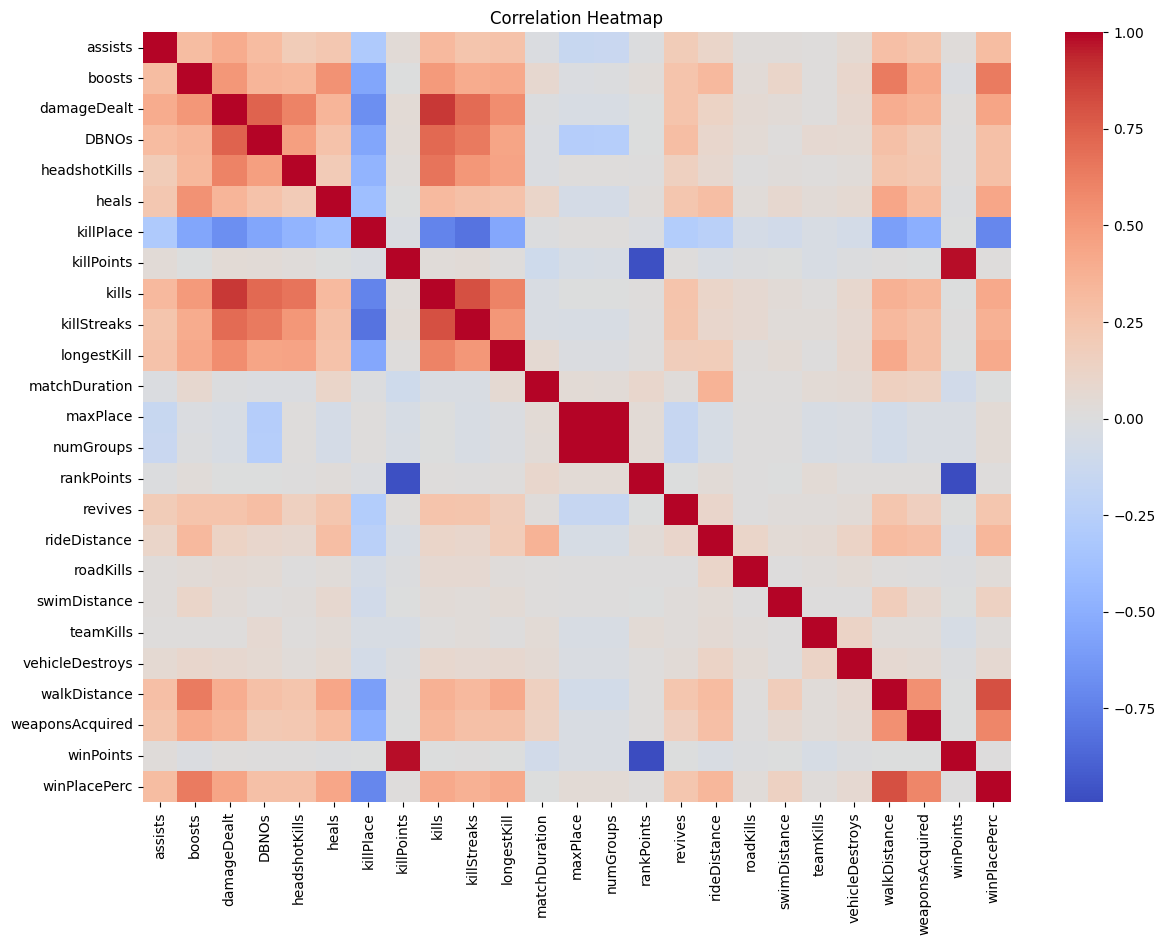

In [ ]:
plt.figure(figsize=(14,10))
corr = data.drop('matchType', axis=1).corr()
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

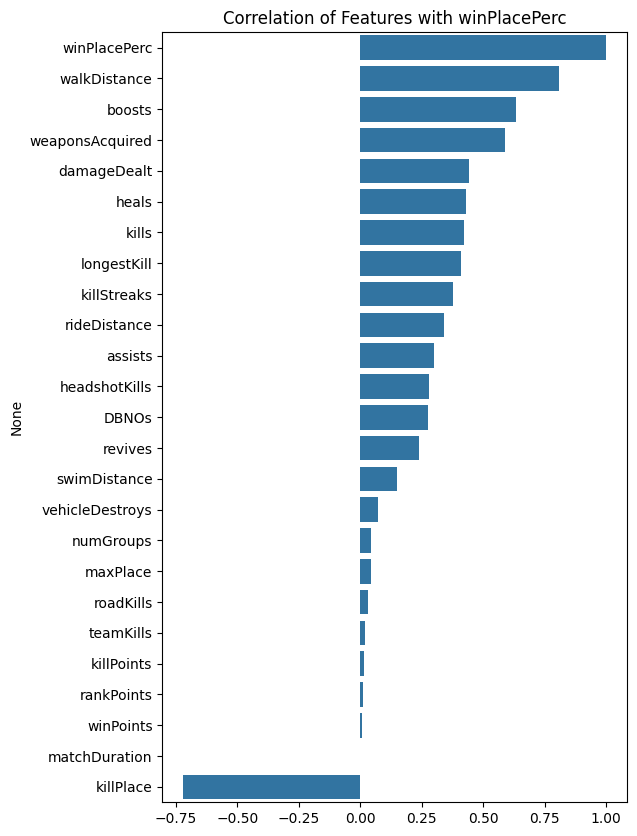

In [ ]:
corr_target = corr["winPlacePerc"].sort_values(ascending=False)
plt.figure(figsize=(6,10))
sns.barplot(x=corr_target.values, y=corr_target.index)
plt.title("Correlation of Features with winPlacePerc")
plt.show()


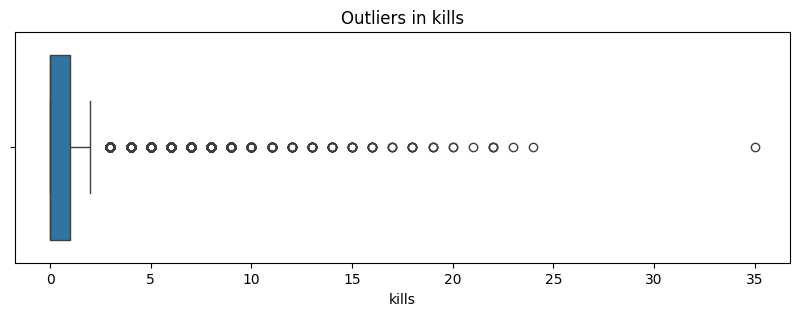

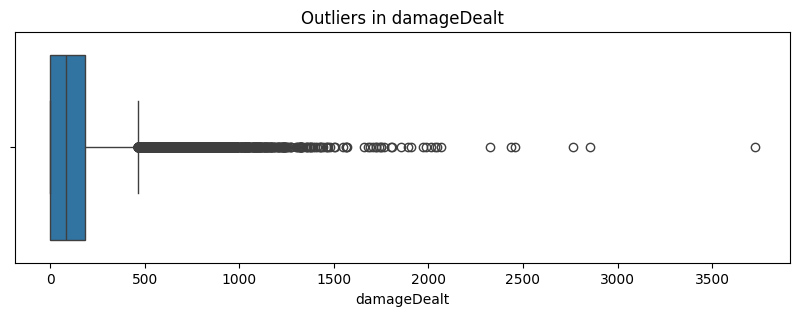

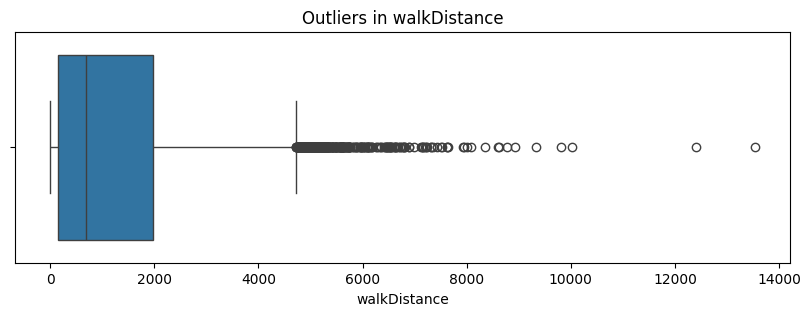

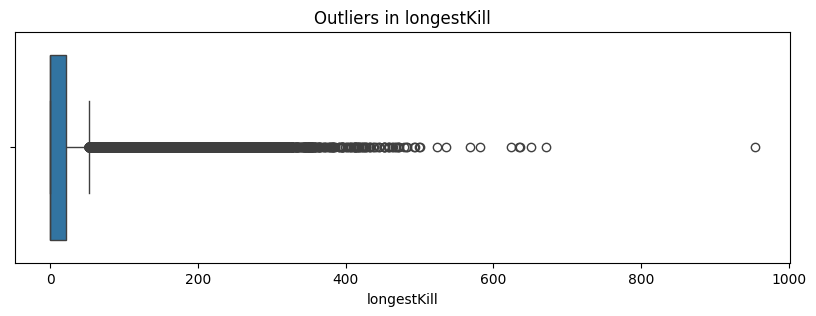

In [ ]:
outlier_features = ["kills", "damageDealt", "walkDistance", "longestKill"]

for col in outlier_features:
    plt.figure(figsize=(10,3))
    sns.boxplot(x=data[col])
    plt.title(f"Outliers in {col}")
    plt.show()


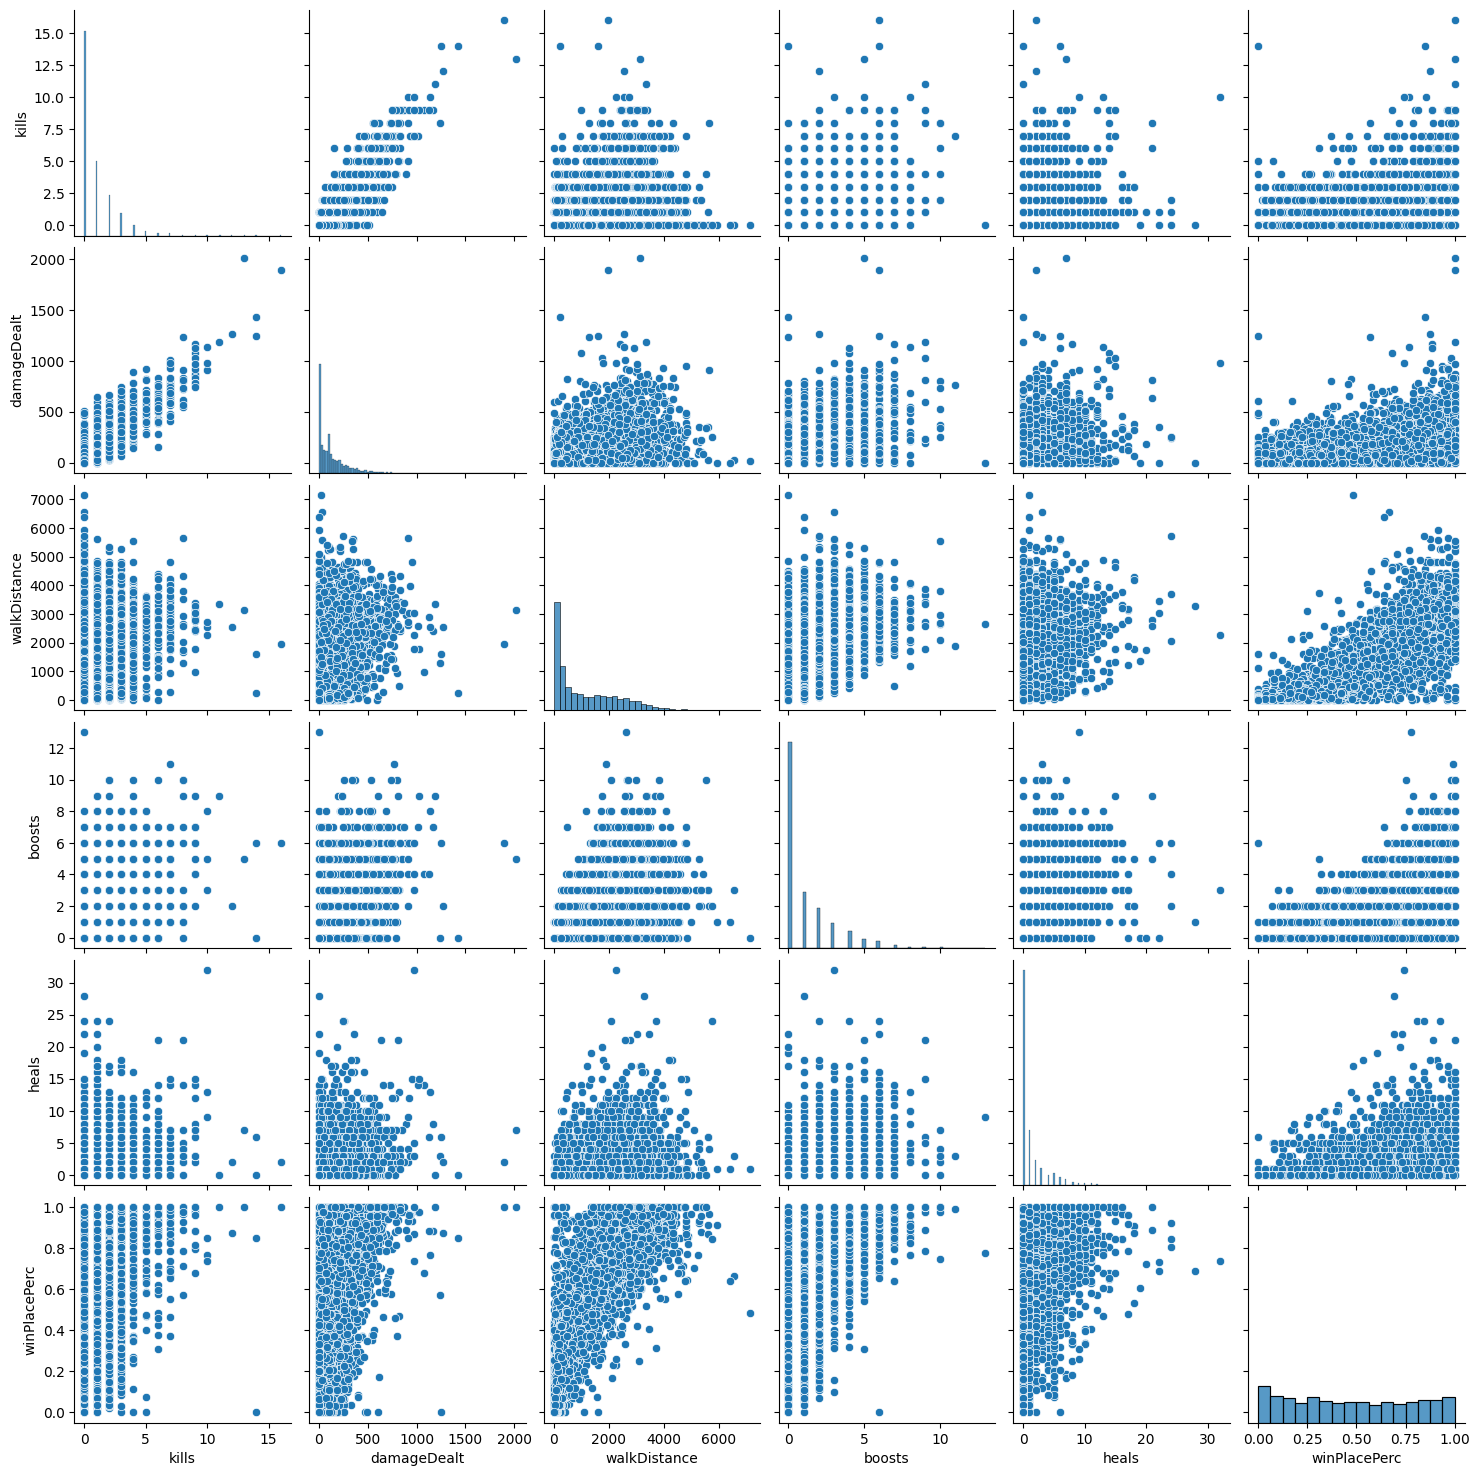

In [ ]:
sample_df = data.sample(5000, random_state=42)

sns.pairplot(sample_df[["kills", "damageDealt", "walkDistance",
                        "boosts", "heals", "winPlacePerc"]])
plt.show()


In [ ]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
assists,63624.0,0.232790,0.582817,0.0,0.00,0.0000,0.00000,13.0
boosts,63624.0,1.123161,1.727653,0.0,0.00,0.0000,2.00000,21.0
damageDealt,63624.0,130.732736,170.457583,0.0,0.00,83.3950,185.90000,3725.0
DBNOs,63624.0,0.655837,1.150242,0.0,0.00,0.0000,1.00000,32.0
headshotKills,63624.0,0.223532,0.590130,0.0,0.00,0.0000,0.00000,17.0
heals,63624.0,1.371605,2.656625,0.0,0.00,0.0000,2.00000,47.0
killPlace,63624.0,47.566437,27.481729,1.0,24.00,47.0000,71.00000,100.0
killPoints,63624.0,506.556520,626.741117,0.0,0.00,0.0000,1172.00000,2140.0
kills,63624.0,0.924981,1.554368,0.0,0.00,0.0000,1.00000,35.0
killStreaks,63624.0,0.544496,0.715751,0.0,0.00,0.0000,1.00000,7.0


In [ ]:
counts = data['matchType'].value_counts()
perc = counts / counts.sum() * 100
print(pd.concat([counts, perc.rename('percent')], axis=1))


                  count    percent
matchType                         
squad-fpp         25226  39.648560
duo-fpp           14238  22.378348
squad              8977  14.109456
solo-fpp           7645  12.015906
duo                4431   6.964353
solo               2604   4.092795
normal-squad-fpp    237   0.372501
crashfpp             98   0.154030
normal-duo-fpp       88   0.138313
normal-solo-fpp      26   0.040865
flaretpp             24   0.037722
flarefpp             11   0.017289
normal-squad         11   0.017289
crashtpp              4   0.006287
normal-duo            3   0.004715
normal-solo           1   0.001572


In [ ]:
(data['walkDistance'] > 20000).sum()
(data['kills'] > 50).sum()
(data['damageDealt'] > 10000).sum()


np.int64(0)

## Exploratory Data Analysis (EDA) – Summary

The target variable `winPlacePerc` shows a continuous distribution suitable for regression, with most players falling in the lower–mid placement range.

Key numerical gameplay features such as `kills`, `damageDealt`, `walkDistance`, `boosts`, and `heals` were analyzed through histograms and boxplots. These features show strong right-skewness and contain expected gameplay outliers.

Categorical analysis of `matchType` indicates that squad-based modes dominate the dataset, creating class imbalance across match types. A boxplot comparing match types with `winPlacePerc` shows noticeable variation in performance trends.

Scatterplots between major gameplay features and the target reveal clear positive relationships: players who move more, deal more damage, or secure more kills generally achieve higher win probabilities.

Correlation analysis confirms that `walkDistance`, `kills`, `damageDealt`, and `boosts` are among the strongest predictors, while ranking-based columns (winPoints, killPoints, rankPoints) show high correlation but may cause leakage.

Additional steps performed include summary statistics, matchType distribution insight, and checks for impossible gameplay values (extreme kills, distance, or damage). These help validate data quality and identify anomalies.

Overall, the dataset is well-understood, contains expected outliers, and is ready for feature engineering and model development.


## Feature Engineering + Model Preparation

In [ ]:
# Drop columns that do not help prediction or cause leakage
cols_to_drop = ["killPoints", "rankPoints", "winPoints"]

# Drop accidental or irrelevant columns
extra_cols = ["numGroup", "numGroups"]
cols_to_drop += [col for col in extra_cols if col in data.columns]

data_fe = data.drop(cols_to_drop, axis=1, errors='ignore')
data_fe.head()


,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,longestKill,...,maxPlace,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc
0,0,0,0.00,0,0,0,60,0,0,0.00,...,28.0,0.0,0.0000,0.0,0.00,0.0,0.0,244.80,1.0,0.4444
1,0,0,91.47,0,0,0,57,0,0,0.00,...,26.0,0.0,0.0045,0.0,11.04,0.0,0.0,1434.00,5.0,0.6400
2,1,0,68.00,0,0,0,47,0,0,0.00,...,50.0,0.0,0.0000,0.0,0.00,0.0,0.0,161.80,2.0,0.7755
3,0,0,32.90,0,0,0,75,0,0,0.00,...,31.0,0.0,0.0000,0.0,0.00,0.0,0.0,202.70,3.0,0.1667
4,0,0,100.00,0,0,0,45,1,1,58.53,...,97.0,0.0,0.0000,0.0,0.00,0.0,0.0,49.75,2.0,0.1875


In [ ]:
import numpy as np

skewed_cols = ["kills", "damageDealt", "walkDistance", "rideDistance",
               "swimDistance", "boosts", "heals", "DBNOs", "longestKill"]

for col in skewed_cols:
    data_fe[col] = np.log1p(data_fe[col])


In [ ]:
# Identify categorical columns that need encoding

cat_cols = [col for col in data.columns
            if data[col].dtype == 'object' or data[col].dtype.name == 'category']

print("Categorical Columns Found:", cat_cols)

# Show number of unique categories in each categorical column
for col in cat_cols:
    print(f"{col}: {data[col].nunique()} unique values")


Categorical Columns Found: ['matchType']
matchType: 16 unique values


In [ ]:
# Label Encoding for matchType (only categorical feature)
from sklearn.preprocessing import LabelEncoder

# Ensure we are working with data_fe, not a separate copy
le = LabelEncoder()
data_fe["matchType"] = le.fit_transform(data_fe["matchType"])

data_fe.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,longestKill,...,maxPlace,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc
0,0,0.0,0.000000,0.0,0,0.0,60,0.000000,0,0.00000,...,28.0,0.0,0.00000,0.0,0.000000,0.0,0.0,5.504518,1.0,0.4444
1,0,0.0,4.526884,0.0,0,0.0,57,0.000000,0,0.00000,...,26.0,0.0,0.00449,0.0,2.488234,0.0,0.0,7.268920,5.0,0.6400
2,1,0.0,4.234107,0.0,0,0.0,47,0.000000,0,0.00000,...,50.0,0.0,0.00000,0.0,0.000000,0.0,0.0,5.092522,2.0,0.7755
3,0,0.0,3.523415,0.0,0,0.0,75,0.000000,0,0.00000,...,31.0,0.0,0.00000,0.0,0.000000,0.0,0.0,5.316648,3.0,0.1667
4,0,0.0,4.615121,0.0,0,0.0,45,0.693147,1,4.08648,...,97.0,0.0,0.00000,0.0,0.000000,0.0,0.0,3.926912,2.0,0.1875


In [ ]:
# Target variable
y = data_fe["winPlacePerc"]

# Features
X = data_fe.drop("winPlacePerc", axis=1)

X.shape, y.shape


((63624, 21), (63624,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((50899, 21), (12725, 21))

## Model Building

In [ ]:
# 📌 Train Multiple Models (Random Forest as Base Model)
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


# Base Model + Additional Models
models = {
    "Random Forest (Base Model)": RandomForestRegressor(
        n_estimators=300, random_state=42, n_jobs=-1
    ),
    "XGBoost": XGBRegressor(
        n_estimators=400, learning_rate=0.05, subsample=0.8,
        colsample_bytree=0.8, random_state=42
    ),
    "Gradient Boosting": GradientBoostingRegressor(
        n_estimators=300, learning_rate=0.05, random_state=42
    ),
    "Linear Regression": LinearRegression()
}

results = []

# Train + Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    # Calculate RMSE by taking the square root of MSE
    rmse = np.sqrt(mean_squared_error(y_test, preds))

    results.append([name, mae, rmse])

# Show results
df_results = pd.DataFrame(results, columns=["Model", "MAE", "RMSE"])
df_results

,Model,MAE,RMSE
0,Random Forest (Base Model),0.064971,0.092059
1,XGBoost,0.060649,0.085162
2,Gradient Boosting,0.067654,0.094586
3,Linear Regression,0.099560,0.131435


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

evaluation_results = []

for name, model in models.items():
    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    # Calculate RMSE by taking the square root of MSE
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    evaluation_results.append([name, mae, rmse, r2])

df_eval = pd.DataFrame(
    evaluation_results,
    columns=["Model", "MAE", "RMSE", "R2 Score"]
)

# Sort by RMSE (lower is better)
df_eval = df_eval.sort_values(by="RMSE")

df_eval

,Model,MAE,RMSE,R2 Score
1,XGBoost,0.060649,0.085162,0.923649
0,Random Forest (Base Model),0.064971,0.092059,0.910781
2,Gradient Boosting,0.067654,0.094586,0.905816
3,Linear Regression,0.099560,0.131435,0.818134


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np # Import numpy for np.sqrt

# Base model
xgb = XGBRegressor(
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

# SIMPLE & FAST parameter grid
param_grid = {
    "n_estimators": [200, 400],
    "max_depth": [4, 6],
    "learning_rate": [0.05, 0.1],
    "subsample": [0.8, 1.0]
}

# Grid Search
grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",   # optimize MSE (RMSE)
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

# Best params
print("Best Parameters:", grid.best_params_)

# Evaluate on test set
best_model = grid.best_estimator_
preds = best_model.predict(X_test)

mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds)) # Calculate RMSE manually
r2 = r2_score(y_test, preds)

print("\n--- Tuned XGBoost Performance ---")
print(f"MAE:  {mae:.6f}")
print(f"RMSE: {rmse:.6f}")
print(f"R²:   {r2:.6f}")

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 400, 'subsample': 0.8}

--- Tuned XGBoost Performance ---
MAE:  0.060589
RMSE: 0.085155
R²:   0.923661


In [ ]:
#RandomForest tuning using RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib, time, numpy as np, pandas as pd


X_tune, y_tune = X_train, y_train

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

param_dist = {
    "n_estimators": [50, 100, 150],          # smaller during tuning
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "max_features": ["sqrt", 0.5, 0.8]       # controls per-tree features (speed + generalization)
}

rs = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,                 # number of parameter settings sampled
    scoring="neg_root_mean_squared_error",
    cv=2,                      # smaller CV for speed
    verbose=2,
    n_jobs=-1,
    random_state=42,
    refit=True
)

t0 = time.time()
rs.fit(X_tune, y_tune)
t1 = time.time()

print(f"Tuning finished in {(t1-t0):.1f} seconds")
print("Best params:", rs.best_params_)
print("Best CV score (neg RMSE):", rs.best_score_)

best_rf = rs.best_estimator_
preds = best_rf.predict(X_test)

print("Test MAE :", mean_absolute_error(y_test, preds))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, preds)))
print("Test R2  :", r2_score(y_test, preds))


Fitting 2 folds for each of 20 candidates, totalling 40 fits
Tuning finished in 306.3 seconds
Best params: {'n_estimators': 150, 'min_samples_split': 5, 'max_features': 0.5, 'max_depth': 20}
Best CV score (neg RMSE): -0.09261592385974826
Test MAE : 0.0647429098952721
Test RMSE: 0.09158592056036327
Test R2  : 0.9116952307800354


## Model Comparison

In [ ]:


data = {
    "Model": [
        "Random Forest (Untuned)",
        "XGBoost (Untuned)",
        "Gradient Boosting (Untuned)",
        "Random Forest (Tuned)",
        "XGBoost (Tuned)"
    ],

    "MAE": [
        0.064971,
        0.060649,
        0.067654,
        0.064743,     # tuned RF
        0.060589      # tuned XGB
    ],

    "RMSE": [
        0.092059,
        0.085162,
        0.094586,
        0.091586,     # tuned RF
        0.085155      # tuned XGB
    ],

    "R2 Score": [
        0.910781,
        0.923649,
        0.905816,
        0.911695,     # tuned RF
        0.923661      # tuned XGB
    ]
}

df_compare = pd.DataFrame(data)
df_compare = df_compare.sort_values(by="RMSE").reset_index(drop=True)
df_compare


,Model,MAE,RMSE,R2 Score
0,XGBoost (Tuned),0.060589,0.085155,0.923661
1,XGBoost (Untuned),0.060649,0.085162,0.923649
2,Random Forest (Tuned),0.064743,0.091586,0.911695
3,Random Forest (Untuned),0.064971,0.092059,0.910781
4,Gradient Boosting (Untuned),0.067654,0.094586,0.905816


## Model Building Conclusion
Multiple machine learning models were trained to predict `winPlacePerc`, including Random Forest, Gradient Boosting, and XGBoost. After encoding the categorical feature and preparing the dataset, each model was evaluated using MAE, RMSE, and R². Hyperparameter tuning was also applied to Random Forest and XGBoost to improve performance.

## Model Comparison Conclusion
Among all models, **Tuned XGBoost** achieved the best results with the lowest MAE (0.0606), lowest RMSE (0.0851), and highest R² (0.9237). This indicates that XGBoost predicts win probability more accurately and generalizes better than both tuned and untuned Random Forest and Gradient Boosting models. Therefore, **Tuned XGBoost** is selected as the final model for this project.


## Saving The Model

In [ ]:
import joblib

# assuming your label encoder is stored in the variable `le`
joblib.dump(le, "matchType_label_encoder.pkl")

print("Label encoder saved as matchType_label_encoder.pkl")


Label encoder saved as matchType_label_encoder.pkl


In [ ]:
import joblib

joblib.dump(best_model, "tuned_xgboost_model.pkl")
print("Model saved as tuned_xgboost_model.pkl")


Model saved as tuned_xgboost_model.pkl


## Model Testing

In [4]:
import pandas as pd
import joblib
import numpy as np # Import numpy for log1p

# 1. Load model and label encoder
model = joblib.load("tuned_xgboost_model.pkl")
le = joblib.load("matchType_label_encoder.pkl")

# 2. Create a sample row of PUBG stats (example values)
sample_df = pd.DataFrame([{
    "assists": 2,
    "boosts": 3,
    "damageDealt": 250.0,
    "DBNOs": 1,
    "headshotKills": 0,
    "heals": 2,
    "killPlace": 40,
    "killPoints": 1200,
    "kills": 2,
    "killStreaks": 1,
    "longestKill": 50.0,
    "matchDuration": 1500,
    "matchType": "squad-fpp",
    "maxPlace": 100,
    "rankPoints": 0,
    "revives": 0,
    "rideDistance": 300.0,
    "roadKills": 0,
    "swimDistance": 0.0,
    "teamKills": 0,
    "vehicleDestroys": 0,
    "walkDistance": 1200.0,
    "weaponsAcquired": 5,
    "winPoints": 1200
}])

# 3. Apply the same preprocessing steps as on the training data
#    a. Drop columns that were dropped from the training set
cols_to_drop_for_prediction = ["killPoints", "rankPoints", "winPoints"]
sample_df = sample_df.drop(columns=cols_to_drop_for_prediction, errors='ignore')

#    b. Encode matchType
sample_df["matchType"] = le.transform(sample_df["matchType"].astype(str))

#    c. Apply log transformation to skewed columns
skewed_cols = ["kills", "damageDealt", "walkDistance", "rideDistance",
               "swimDistance", "boosts", "heals", "DBNOs", "longestKill"]
for col in skewed_cols:
    if col in sample_df.columns:
        sample_df[col] = np.log1p(sample_df[col])

# 4. Predict winPlacePerc
prediction = model.predict(sample_df)[0]

print("Predicted winPlacePerc:", prediction)
# 5. Convert prediction to actual percentage
prediction_percent = prediction * 100

print(f"Predicted winPlacePerc (Percentage): {prediction_percent:.2f}%")



Predicted winPlacePerc: 0.5861563
Predicted winPlacePerc (Percentage): 58.62%


## Conclusion

This project successfully developed a machine learning model to predict the win probability (`winPlacePerc`) of PUBG players using in-game performance statistics. After data cleaning, exploratory analysis, encoding, and model benchmarking, multiple algorithms were evaluated, including Random Forest, Gradient Boosting, and XGBoost.

Among all models, the **Tuned XGBoost Regressor** delivered the best performance with the lowest MAE and RMSE and the highest R² score, indicating strong predictive accuracy and generalization. Feature engineering and hyperparameter tuning further enhanced model performance. The final model was saved along with the label encoder, and a complete prediction pipeline was prepared for future use.

Overall, the project demonstrates an effective workflow for handling large-scale game data and deploying a robust win probability prediction system.
